In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv('master0.csv')
stats.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


1) для начала посмотрим динамику самоубийств. Тк мы смотрим распределение количества суицидов по годам, то построим линейную диаграмму, в которой используем данные количества самоубийств, сгруппированные по годам. Все используемые данные являются целыми числами.

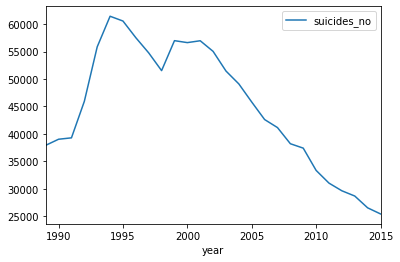

In [3]:
suicide_rus = stats[stats.country == 'Russian Federation']
stats_1 = suicide_rus[['year', 'suicides_no']].groupby('year').sum()
stats_1.plot()

2) Как видно из графика, пик самоубийств пришелся на "лихие девяностые". Предположительно значительную часть суицидов совершали мужчины, так как сложная экономическая ситуация, алкоголь, расцвет бандитизма оказали на них влияние в большей степени. Чтобы посмотреть доли самоубийств мужчин и женщин, построим столбчатую диаграмму, используя данные по суицидам в разрезе пола и по годам (год и суициды - целые числа, пол - строки)

In [4]:
stats_sex = suicide_rus[['year', 'sex', 'suicides_no']].groupby(['year', 'sex']).sum().unstack('sex')
stats_sex.head()

suicides_no       
sex       female   male
year                   
1989        8548  29373
1990        8742  30286
1991        8460  30821
1992        9129  36794
1993       10096  45750

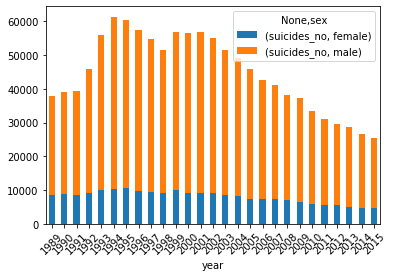

In [5]:
stats_sex[list(stats_sex.columns)].plot(kind='bar', rot=45, stacked=True)

3) видно значительное превышение количества мужских самоубийств над женскими, которые довольно равномерны и не показывают резких колебаний. Посмотрим распределение суицидников по возрастным группам с помощью круговой диаграммы. Для этого используем данные по возрастной группе (строка) и по количеству суицидов(целые числа)

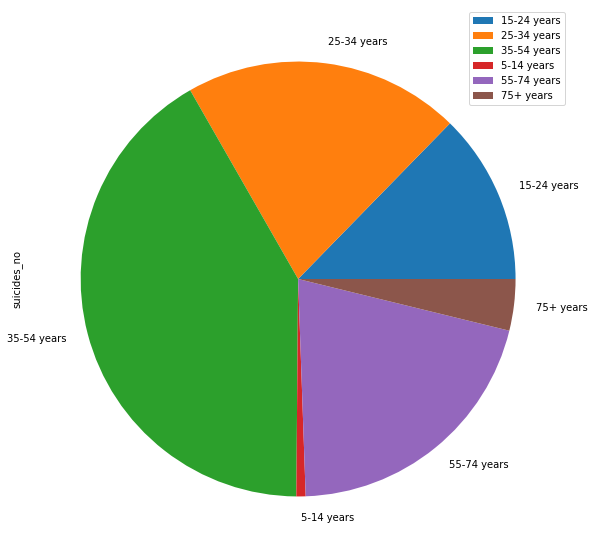

In [37]:
stats_male = suicide_rus[suicide_rus.sex == 'male'][['age', 'suicides_no']].groupby('age').sum()
stats_male.plot(kind='pie', y='suicides_no')

4) Как видно из диаграммы, наибольшую долю самоубийц составляют мужчины среднего возраста. Посмотрим корреляцию между количеством самоубийств и годовым ВВП, построив join plot.

In [6]:
import seaborn as sns

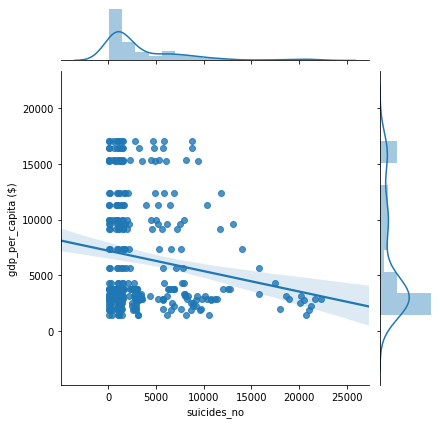

In [101]:
sns.jointplot(x='suicides_no', y='gdp_per_capita ($)', 
              data=suicide_rus, kind='reg')

наблюдается обратная зависимость: чем меньше ВВП и хуже экономическая обстановка в стране, тем больше количество самоубийств.

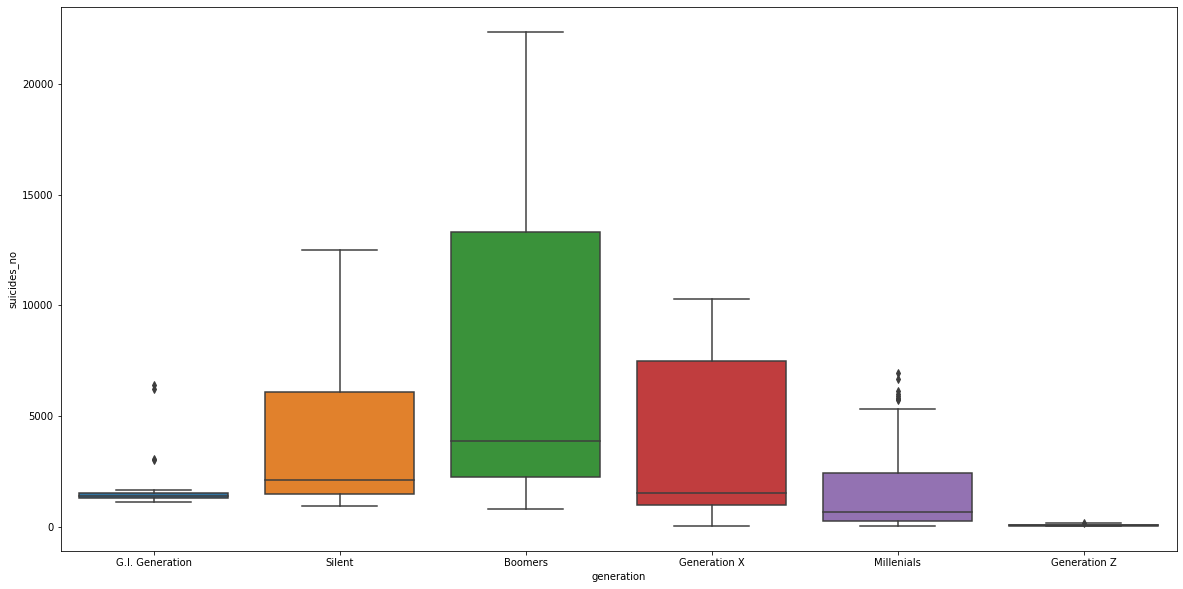

In [102]:
generation_boxplot = sns.boxplot(x="generation", y="suicides_no", data=suicide_rus[['generation', 'suicides_no']])